# Worksheet 8 - Regression

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:
- Recognize situations where a simple regression analysis would be appropriate for making predictions.
- Explain the k-nearest neighbour ($k$-nn) regression algorithm and describe how it differs from $k$-nn classification.
- Interpret the output of a $k$-nn regression.
- In a dataset with two variables, perform k-nearest neighbour regression in R using `tidymodels` to predict the values for a test dataset.
- Using R, execute cross-validation in R to choose the number of neighbours.
- Using R, evaluate $k$-nn regression prediction accuracy using a test data set and an appropriate metric (e.g., root mean square prediction error, RMSPE).
- In the context of $k$-nn regression, compare and contrast goodness of fit and prediction properties (namely RMSE vs RMSPE).
- Describe advantages and disadvantages of the $k$-nearest neighbour regression approach.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("tests.R")
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Question 0.0** Multiple Choice: 
<br> {points: 1}

To predict a value of $Y$ for a new observation using $k$-nn **regression**, we identify the $k$-nearest neighbours and then:

A. Assign it the median of the $k$-nearest neighbours as the predicted value

B. Assign it the mean of the $k$-nearest neighbours as the predicted value

C. Assign it the mode of the $k$-nearest neighbours as the predicted value

D. Assign it the majority vote of the $k$-nearest neighbours as the predicted value

*Save the letter of the answer you think is correct to a variable named `answer0.0`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [2]:

answer0.0 <- "B"

In [3]:
test_0.0()

Test passed 🌈
[1] "Success!"


**Question 0.1** Multiple Choice: 
<br> {points: 1}

Of those shown below, which is the correct formula for RMSPE?


A. $RMSPE = \sqrt{\frac{\frac{1}{n}\sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2}{1 - n}}$

B. $RMSPE = \sqrt{\frac{1}{n - 1}\sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2}$

C. $RMSPE = \sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2}$

D. $RMSPE = \sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}(y_i - \hat{y_i})}$ 

*Save the letter of the answer you think is correct to a variable named `answer0.1`. Make sure you put quotations around the letter and pay attention to case.*

In [4]:

answer0.1 <- "C"

In [5]:
test_0.1()

Test passed 😀
[1] "Success!"


**Question 0.2**
<br> {points: 1}

The plot below is a very simple k-nn regression example, where the black dots are the data observations and the blue line is the predictions from a $k$-nn regression model created from this data where $k=2$.

Using the formula for RMSE (given in the reading), and the graph below, by hand (pen and paper or use R as a calculator) calculate RMSE for this model. Use **one decimal place of precision** when inputting the heights of the black dots and blue line. Save your answer to a variable named `answer0.2` 

*Note: The predicted value when x = 1 is 1.3 (it's a bit hard to tell from the figure!)*

<img align="left" src="img/k-nn_RMSE.jpeg" />

In [ ]:
# Given the black dot values: 1, 1, 2, 3, 5, 7.
# Given the line values: 1.3, 1.5, 1.5, 2, 6, 6.

# Residuals: (1 - 1.3), (1 - 1.5), (2 - 1.5), (3 - 2), (5 - 6), (7 - 6).
# Residuals: -0.3, -0.5, 0.5, 1, -1, 1.

# Squared residuals: (-0.3)^2, (-0.5)^2, (0.5)^2, (1)^2, (-1)^2, (1)^2.
# Squared residuals: 0.09, 0.25, 0.25, 1, 1, 1.

# Average squared residuals: (0.09 + 0.25) / 2.
# Average squared residuals: 0.17.

# RMSE: sqrt(0.17) ≈ 0.4123.

#  RMSE  is 0.4123

In [16]:

answer0.2 <- "0.7"

In [17]:
test_0.2()

── Error (???): Solution is incorrect ──────────────────────────────────────────
Error in `x * 10^digits`: non-numeric argument to binary operator
Backtrace:
 1. testthat::expect_equal(digest(int_round(answer0.2, 2)), "6953b334169bd7ec7da1c1eda5aaf6a5")
 6. global int_round(answer0.2, 2)



ERROR: [1m[33mError[39m in [1m[1m`reporter$stop_if_needed()`:[22m
[33m![39m Test failed


### RMSPE Definition

**Question 0.3** Multiple Choice: 
<br> {points: 1}

What does RMSPE stand for?


A. root mean squared prediction error

B. root mean squared percentage error 

C. root mean squared performance error 

D. root mean squared preference error 

*Save the letter of the answer you think is correct to a variable named `answer0.3`. Make sure you put quotations around the letter and pay attention to case.*

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
answer0.3

In [ ]:
test_0.3()

## Marathon Training

<img src='https://media.giphy.com/media/nUN6InE2CodRm/giphy.gif' width='400'>

Source: https://media.giphy.com/media/nUN6InE2CodRm/giphy.gif

What predicts which athletes will perform better than others? Specifically, we are interested in marathon runners, and looking at how the maximum distance ran per week (in miles) during race training predicts the time it takes a runner to finish the race? For this, we will be looking at the `marathon.csv` file in the `data/` folder.

**Question 1.0** 
<br> {points: 1}

Load the data and assign it to an object called `marathon`. 

In [18]:

marathon <- read_csv("data/marathon.csv")

Rows: 929 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): age, bmi, female, footwear, group, injury, mf_d, mf_di, mf_ti, max...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [19]:
test_1.0()

Test passed 😀
Test passed 😀
Test passed 😸
Test passed 🥇
[1] "Success!"


**Question 2.0**
<br> {points: 1}

We want to predict race time (in hours) (`time_hrs`) given a particular value of maximum distance ran per week (in miles) during race training (`max`). Let's take a subset of size 50 individuals of our marathon data and assign it to an object called `marathon_50`. With this subset, plot a scatterplot to assess the relationship between these two variables. Put `time_hrs` on the y-axis and `max` on the x-axis. **Assign this plot to an object called `answer2`.** Discuss, with a classmate, the relationship between race time and maximum distance ran per week during training based on the scatterplot you create below. 

*Hint: To take a subset of your data you can use the `sample_n()` function*

In [20]:
options(repr.plot.width = 8, repr.plot.height = 7)

set.seed(2000) ### DO NOT CHANGE

marathon_50 <- marathon |>
    sample_n(50)
marathon_50



age,bmi,female,footwear,group,injury,mf_d,mf_di,mf_ti,max,sprint,mf_s,time_hrs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31,22.31224,0,2,1,1,42195,4,12084,59,1,3.491807,3.356667
32,22.51830,0,2,2,1,42195,3,10968,82,1,3.847101,3.046667
52,26.71614,0,2,3,2,42195,2,16055,40,0,2.628153,4.459722
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,21.64073,0,2,2,2,42195,4,8242,130,1,5.119510,2.289444
29,31.14187,0,2,3,1,42195,2,13560,50,0,3.111726,3.766667
28,21.49646,0,2,1,2,42195,3,9363,71,1,4.506568,2.600833


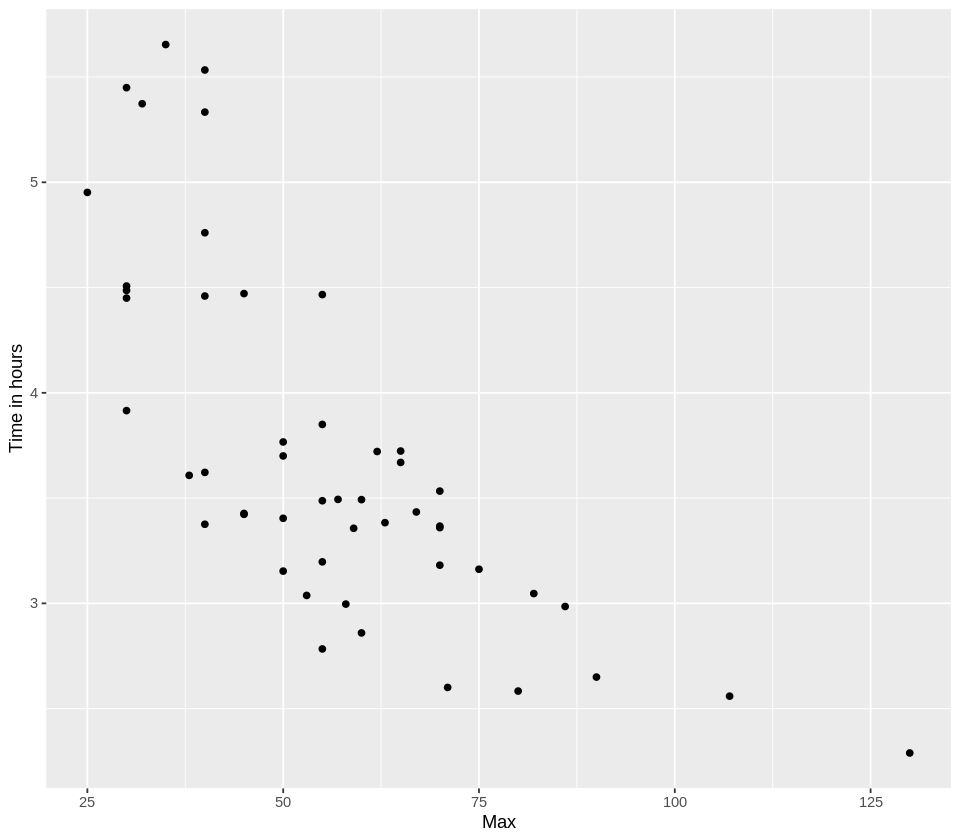

In [27]:
answer2 <- ggplot(marathon_50, aes(x = max, y = time_hrs)) +
  geom_point() +
  labs(x = "Max", y = "Time in hours")
answer2

In [28]:
test_2.0()

Test passed 🥇
Test passed 🎉
Test passed 🎉
Test passed 🥳
Test passed 😸
Test passed 😀
Test passed 😀
[1] "Success!"


**Question 3.0**
<br> {points: 1}

Suppose we want to predict the race time for someone who ran a maximum distance of 100 miles per week during training. In the plot below we can see that no one has run a maximum distance of 100 miles per week. But, if we are interested in prediction, how can we predict with this data? We can use $k$-nn regression! To do this we get the $Y$ values (target/response variable) of the nearest $k$ values and then take their average and use that as the prediction. 

For this question predict the race time based on the 4 closest neighbors to the 100 miles per week during training.

*Fill in the scaffolding below and assign your answer to an object named `answer3`.*

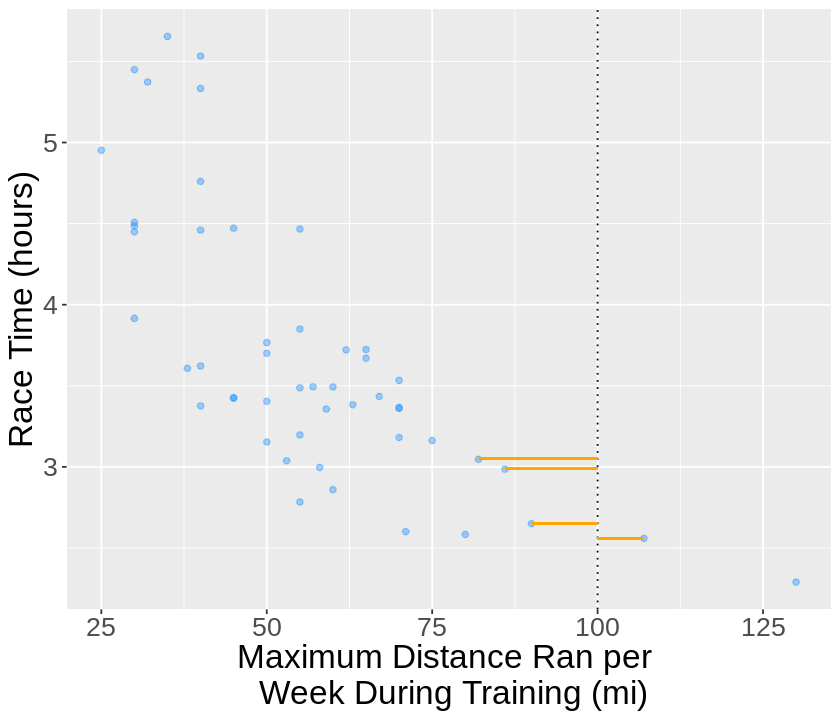

In [29]:
# run this cell to see a visualization of the 4 nearest neighbours
options(repr.plot.height = 6, repr.plot.width = 7)
marathon_50 |>
    ggplot(aes(x = max, y = time_hrs)) + 
        geom_point(color = 'dodgerblue', alpha = 0.4) +
        geom_vline(xintercept = 100, linetype = "dotted") +
        xlab("Maximum Distance Ran per \n Week During Training (mi)") +
        ylab("Race Time (hours)") + 
        geom_segment(aes(x = 100, y = 2.56, xend = 107, yend = 2.56), col = "orange") +
        geom_segment(aes(x = 100, y = 2.65, xend = 90, yend = 2.65), col = "orange") +
        geom_segment(aes(x = 100, y = 2.99, xend = 86, yend = 2.99), col = "orange") +
        geom_segment(aes(x = 100, y = 3.05, xend = 82, yend = 3.05), col = "orange") +
        theme(text = element_text(size = 20))

In [36]:
#... <- ... |> 
#  mutate(diff = abs(100 - ...)) |> 
#  ...(diff) |> 
#  slice(...) |>  
#  summarise(predicted = ...(...)) |>
#  pull()


answer3 <- marathon_50 |> 
 mutate(diff = abs(100 - max)) |> 
 arrange(diff) |> 
 slice(1:4) |>  
 summarise(predicted = mean(time_hrs)) |>
 pull()

answer3

[1] 2.810347

In [37]:
test_3.0()

Test passed 🥳
Test passed 🥇
[1] "Success!"


**Question 4.0**
<br> {points: 1}

For this question, let's instead predict the race time based on the 2 closest neighbors to the 100 miles per week during training.

*Assign your answer to an object named `answer4`.*

In [39]:

answer4 <- marathon_50 |> 
 mutate(diff = abs(100 - max)) |> 
 arrange(diff) |> 
 slice(1:2) |>  
 summarise(predicted = mean(time_hrs)) |>
 pull()
answer4

[1] 2.604722

In [40]:
test_4.0()

Test passed 🎊
Test passed 😸
[1] "Success!"


**Question 5.0** Multiple Choice:
<br> {points: 1}

So far you have calculated the $k$ nearest neighbors predictions manually based on $k$'s we have told you to use. However, last week we learned how to use a better method to choose the best $k$ for classification. 

Based on what you learned last week and what you have learned about $k$-nn regression so far this week, which method would you use to choose the $k$ (in the situation where we don't tell you which $k$ to use)?

- A) Choose the $k$ that excludes most outliers
- B) Choose the $k$ with the lowest training error
- C) Choose the $k$ with the lowest cross-validation error
- D) Choose the $k$ that includes the most data points
- E) Choose the $k$ with the lowest testing error

*Assign your answer to an object called `answer5`.  Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [49]:
answer5 <- "C"

In [50]:
test_5.0()

Test passed 🎉
Test passed 🌈
[1] "Success!"


**Question 6.0**
<br> {points: 1}

We have just seen how to perform k-nn regression manually, now we will apply it to the whole dataset using the `tidymodels` package. To do so, we will first need to create the training and testing datasets. Split the data using *75%* of the `marathon` data as your training set and set `time_hrs` as the `strata` argument. Store this data into an object called `marathon_split`. 

Then, use the appropriate `training` and `testing` functions to create your training set which you will call `marathon_training` and your testing set which you will call `marathon_testing`. Remember we won't touch the test dataset until the end. 

In [ ]:
set.seed(2000) ### DO NOT CHANGE

#... <- initial_split(..., prop = ..., strata = ...)
#... <- training(...)
#... <- testing(...)


# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_6.0()

**Question 7.0**
<br> {points: 1}

Next, we’ll use cross-validation on our **training data** to choose $k$. In $k$-nn classification, we used accuracy to see how well our predictions matched the true labels. In the context of $k$-nn *regression*, we will use RMPSE instead. Interpreting the RMPSE value can be tricky but generally speaking, if the prediction values are very close to the true values, the RMSPE will be small. Conversely, if the prediction values are *not* very close to the true values, the RMSPE will be quite large. 

Let's perform a cross-validation and choose the optimal $k$. First, create a model specification for $k$-nn. We are still using the $k$-nearest neighbours algorithm, and so we will still use the same package for the model engine as we did in classification (`"kknn"`). As usual, specify that we want to use the *straight-line distance*. However, since this will be a regression problem, we will use `set_mode("regression")` in the model specification. Store your model specification in an object called `marathon_spec`. 

Moreover, create a recipe to preprocess our data. Store your recipe in an object called `marathon_recipe`. The recipe should specify that the response variable is race time (hrs) and the predictor is maximum distance ran per week during training.

In [ ]:
set.seed(1234) #DO NOT REMOVE

#... <- nearest_neighbor(weight_func = ..., neighbors = ...) |> 
#       set_engine(...) |>
#       set_mode(...) 

#... <- recipe(... ~ ..., data = ...) |>
#       step_scale(...) |>
#       step_center(...)
#  

# your code here
fail() # No Answer - remove if you provide an answer
marathon_recipe

In [ ]:
test_7.0()

**Question 7.1**
<br>{points: 1}

Now, create the splits for cross-validation with *5 folds* using the `vfold_cv` function. Store your answer in an object called `marathon_vfold`. Make sure to set the `strata` argument.

Then, use the `workflow` function to combine your model specification and recipe. Store your answer in an object called `marathon_workflow`. 

In [ ]:
set.seed(1234) # DO NOT REMOVE

# your code here
fail() # No Answer - remove if you provide an answer
marathon_workflow

In [ ]:
test_7.1()

**Question 8.0**
<br> {points: 1}

If you haven't noticed by now, the major difference compared to other workflows from Chapters 6 and 7 is that we are running a *regression* rather than a *classification*. Specifying *regression* in the `set_mode` function essentially tells `tidymodels` that we need to use different metrics (RMPSE rather than accuracy) for tuning and evaluation. 

Now, let's use the RMSPE to find the best setting for $k$ from our workflow. Let's test the values $k = 1, 11, 21, 31, ..., 81$.

First, create a tibble with a column called `neighbors` that contains the sequence of values. Remember that you should use the `seq` function to create the range of $k$s that goes *from* 1 *to* 81 *by jumps of* 10.  Assign that tibble to an object called `gridvals`. 

Next, tune your workflow such that it tests all the values in `gridvals` and *resamples* using your cross-validation data set. Finally, collect the statistics from your model. Assign your answer to an object called `marathon_results`.

In [ ]:
set.seed(2019) # DO NOT CHANGE
# your code here
fail() # No Answer - remove if you provide an answer
marathon_results

In [ ]:
test_8.0()

**Question 8.1**
<br> {points: 1}

Great! Now find the *minimum* RMSPE along with it's associated metrics such as the mean and standard error, to help us find the number of neighbors that will serve as our best $k$ value. Your answer should simply be a tibble with one row. Assign your answer to an object called `marathon_min`.

In [ ]:
set.seed(2020) # DO NOT REMOVE

#... <- marathon_results |>
#    filter(.metric == ...) |>
#    arrange(...) |> 
#    ...

# your code here
fail() # No Answer - remove if you provide an answer
marathon_min

In [ ]:
test_8.1()

**Question 8.2**
<br> {points: 1}

To assess how well our model might do at predicting on unseen data, we will assess its RMSPE on the test data. To do this, we will first re-train our $k$-nn regression model on the entire training data set, using the $K$ value we obtained from **Question 8.1**. 

To start, pull the best `neighbors` value from `marathon_min` and store it an object called `k_min`. 

Following that, we will repeat the workflow analysis again but with a brand new model specification with `k_min`. Remember, we are doing a regression analysis, so please select the appropriate mode. Store your new model specification in an object called `marathon_best_spec` and your new workflow analysis in an object called `marathon_best_fit`. You can reuse this `marathon_recipe` for this workflow, as we do not need to change it for this task.

Then, we will use the `predict` function to make predictions on the test data, and use the `metrics` function again to compute a summary of the regression's quality. Store your answer in an object called `marathon_summary`. 

In [ ]:
set.seed(1234) # DO NOT REMOVE

#... <- marathon_min |>
#          pull(...)

#... <- nearest_neighbor(weight_func = ..., neighbors = ...) |>
#          set_engine(...) |>
#          set_mode(...)

#... <- workflow() |>
#          add_recipe(...) |>
#          add_model(...) |>
#          fit(data = ...)

#... <- marathon_best_fit |>
#           predict(...) |>
#           bind_cols(...) |>
#           metrics(truth = ..., estimate = ...)

# your code here
fail() # No Answer - remove if you provide an answer
marathon_summary

In [ ]:
test_8.2()

What does this RMSPE score mean? RMSPE is measured in the units of the target/response variable, so it can sometimes be a bit hard to interpret. But in this case, we know that a typical marathon race time is somewhere between 3 - 5 hours. So this model allows us to predict a runner's race time up to about +/-0.6 of an hour, or +/- 36 minutes. This is not *fantastic*, but not *terrible* either. We can certainly use the model to determine roughly whether an athlete will have a bad, good, or excellent race time, but probably cannot reliably distinguish between athletes of a similar caliber.

For now, let’s consider this approach to thinking about RMSPE from our testing data set: as long as its not significantly worse than the cross-validation RMSPE of our best model (**Question 8.1**), then we can say that we’re not doing too much worse on the test data than we did on the training data. In future courses on statistical/machine learning, you will learn more about how to interpret RMSPE from testing data and other ways to assess models.  

**Question 8.3** True or False:
<br>{points: 1}

The RMPSE from our testing data set is *much worse* than the cross-validation RMPSE of our best model. 

*Assign your answer to an object named `answer8.3`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_8.3()

**Question 9.0**
<br> {points: 1}

Let's visualize what the relationship between `max` and `time_hrs` looks like with our best $k$ value to ultimately explore how the $k$ value affects $k$-nn regression.

To do so, use the `predict` function on the workflow analysis that utilizes the best $k$ value (`marathon_best_fit`) to create predictions for the `marathon_training` data. Then, add the column of predictions to the `marathon_training` data frame using `bind_cols`. Name the resulting data frame `marathon_preds`.

Next, create a scatterplot with the maximum distance ran per week against the marathon time from `marathon_preds`. Assign your plot to an object called `marathon_plot`. **Plot the predictions as a blue line over the data points.** Remember the fundamentals of effective visualizations such as having a **title** and **human-readable axes**. 

*Note: use `geom_point` before `geom_line` when creating the plot to ensure tests pass!*

In [ ]:
set.seed(2019) # DO NOT CHANGE

options(repr.plot.width = 7, repr.plot.height = 7)

# your code here
fail() # No Answer - remove if you provide an answer
marathon_plot

In [ ]:
test_9.0()

In [ ]:
source('cleanup.R')